In [2]:
from gold_room_env import MiniHackGoldRoom
from utils import show_episode, ALLOWED_COMPOSITE_MOVES, ALLOWED_SIMPLE_MOVES
from planning import a_star_search, uniform_cost_search, greedy_search, apply
#from online_search import online_greedy_search
import gym
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

In [3]:
WIDTH = 4
HEIGHT = 4
N_GOLDS = 4
N_LEPS = 0
GOLD_SCORE = 100
STAIR_SCORE = 0
TIME_PENALTY = -1
MAX_STEPS = 100

SEARCH_ALGORITHMS = [a_star_search, uniform_cost_search, greedy_search]
ALG_NAMES = ['A*', 'Uniform Cost', 'Greedy']
ALLOWED_MOVES_FUNCTIONS = [ALLOWED_SIMPLE_MOVES, ALLOWED_COMPOSITE_MOVES]
MOVE_NAMES = ['simple moves', 'composite moves']

env = gym.make(
    'MiniHack-MyTask-Custom-v0',
    width=WIDTH,
    height=HEIGHT,
    n_leps=N_LEPS,
    n_golds=N_GOLDS,
    max_episode_steps=MAX_STEPS,
    gold_score=GOLD_SCORE,
    stair_score=STAIR_SCORE,
    time_penalty=TIME_PENALTY
    )

print(f'Starting position: {env.agent_coord}, Stair position: {env.stair_coord}')
print(f'Gold positions: {env.gold_coords}\n')

planning_stats = {}

for search_algorithm, alg_name in zip(SEARCH_ALGORITHMS, ALG_NAMES):
    temp = {}
    for moves_function, moves_name in zip(ALLOWED_MOVES_FUNCTIONS, MOVE_NAMES):
        plan, n_expanded = search_algorithm(env=env, allowed_moves_function=moves_function)
        temp[moves_name] = {
            'algorithm': search_algorithm,
            'moves': moves_name,
            'plan': plan,
            'n_expanded': n_expanded
        }
        print(f'Algorithm: {alg_name} ({moves_name})\nExpanded nodes: {n_expanded}')
        plan.show(env=env)
        print('\n')
    planning_stats[alg_name] = temp

Starting position: (1, 3), Stair position: (2, 3)
Gold positions: [(2, 2), (0, 1), (0, 3), (1, 2)]

Algorithm: A* (simple moves)
Expanded nodes: 55
Path: [(1, 3), (0, 3), (0, 2), (0, 1), (1, 2), (2, 2), (2, 3)]
Actions: ['W', 'S', 'S', 'NE', 'E', 'N']
Total score: 393.586


Algorithm: A* (composite moves)
Expanded nodes: 75
Path: [(1, 3), (0, 3), (0, 2), (0, 1), (1, 2), (2, 2), (2, 3)]
Actions: ['W', 'S', 'S', 'NE', 'E', 'N']
Total score: 393.586


Algorithm: Uniform Cost (simple moves)
Expanded nodes: 19
Path: [(1, 3), (0, 3), (1, 2), (2, 2), (1, 2), (0, 1), (1, 2), (2, 3)]
Actions: ['W', 'SE', 'E', 'W', 'SW', 'NE', 'NE']
Total score: 391.343


Algorithm: Uniform Cost (composite moves)
Expanded nodes: 26
Path: [(1, 3), (1, 2), (0, 1), (0, 2), (0, 3), (1, 3), (2, 2), (2, 3)]
Actions: ['S', 'SW', 'N', 'N', 'E', 'SE', 'N']
Total score: 392.172


Algorithm: Greedy (simple moves)
Expanded nodes: 222
Path: [(1, 3), (0, 2), (0, 1), (1, 2), (2, 3)]
Actions: ['SW', 'S', 'NE', 'NE']
Total score

In [4]:
application_results = {}

for algorithm in ALG_NAMES:
    temp = {}
    for moves in MOVE_NAMES:
        env.myreset()
        states, rewards, done = apply(env, planning_stats[algorithm][moves]['plan'])
        temp[moves] = {
            'states': states,
            'rewards': rewards,
            'done': done
        }
        rws_round = []
        for r in rewards:
            rws_round.append(round(r, 3))
        sum_rws = sum(rewards)
        sum_rws_round = round(sum_rws, 3)
        print(f'{algorithm} ({moves})\nRewards: {rws_round}, sum: {sum_rws_round}\n')
    application_results[algorithm] = temp

A* (simple moves)
Rewards: [0, 99.0, -1.0, 99.0, 98.586, 99.0, -1.0], sum: 393.586

A* (composite moves)
Rewards: [0, 99.0, -1.0, 99.0, 98.586, 99.0, -1.0], sum: 393.586

Uniform Cost (simple moves)
Rewards: [0, 99.0, 98.586, 99.0, -1.0, 98.586, -1.414, -1.414], sum: 391.343

Uniform Cost (composite moves)
Rewards: [0, 99.0, 98.586, -1.0, 99.0, -1.0, 98.586, -1.0], sum: 392.172

Greedy (simple moves)
Rewards: [0, -1.414, 99.0, 98.586, -1.414], sum: 194.757

Greedy (composite moves)
Rewards: [0, -1.414, 99.0, 98.586, -1.414], sum: 194.757



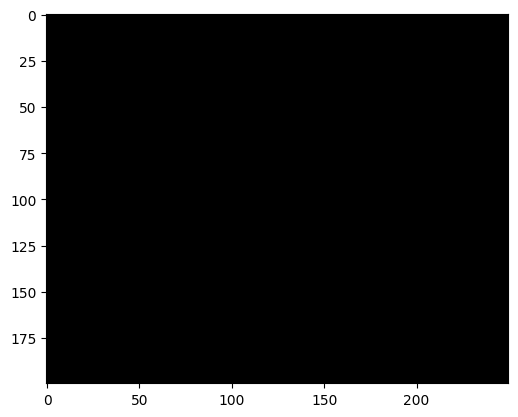

In [5]:
show_episode(application_results['A*']['simple moves']['states'], clear_output=True)

In [2]:
from gold_room_env import MiniHackGoldRoom
from utils import show_episode, ALLOWED_COMPOSITE_MOVES, ALLOWED_SIMPLE_MOVES
from planning import a_star_search, uniform_cost_search, greedy_search, apply
from online_search import online_search_f, online_greedy_search
import gym
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

In [58]:
WIDTH = 5
HEIGHT = 5
N_GOLDS = 5
N_LEPS = 0
GOLD_SCORE = 100
STAIR_SCORE = 0
TIME_PENALTY = -1
MAX_STEPS = 100

env = gym.make(
    'MiniHack-MyTask-Custom-v0',
    width=WIDTH,
    height=HEIGHT,
    n_leps=N_LEPS,
    n_golds=N_GOLDS,
    max_episode_steps=MAX_STEPS,
    gold_score=GOLD_SCORE,
    stair_score=STAIR_SCORE,
    time_penalty=TIME_PENALTY
    )

print(f'Starting position: {env.agent_coord}, Stair position: {env.stair_coord}')
print(f'Gold positions: {env.gold_coords}\n')

env.myreset()
states, rewards, done, iters, steps = online_search_f(env=env, max_steps=MAX_STEPS)
rws_round = [round(r, 3) for r in rewards]
sum_rws_round = round(sum(rewards), 3)
print(f'Online Greedy Search\nRewards: {rws_round}, sum: {sum_rws_round}\n')

Starting position: (4, 0), Stair position: (4, 3)
Gold positions: [(4, 4), (3, 3), (0, 3), (2, 4), (2, 1)]

Online Greedy Search
Rewards: [0.0, -1.0, -1.0, 98.586, 98.586, -1.0, 99.0, -1.0, -1.0, -1.0, 98.586, -1.0, -1.0, 98.586, -1.0, -1.0, -1.0, -1.0], sum: 481.343



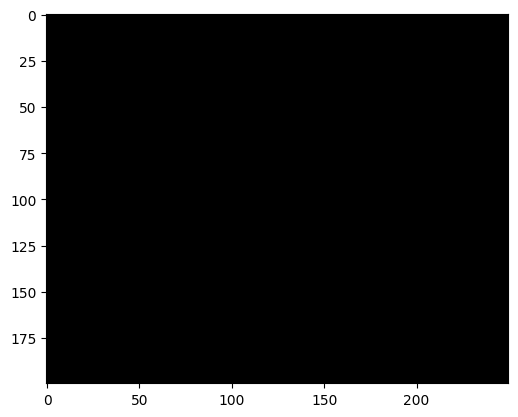

In [59]:
show_episode(states, clear_output=True)

In [56]:
WIDTH = 5
HEIGHT = 5
N_GOLDS = 5
N_LEPS = 5
GOLD_SCORE = 100
STAIR_SCORE = 0
TIME_PENALTY = -1
MAX_STEPS = 100

env = gym.make(
    'MiniHack-MyTask-Custom-v0',
    width=WIDTH,
    height=HEIGHT,
    n_leps=N_LEPS,
    n_golds=N_GOLDS,
    max_episode_steps=MAX_STEPS,
    gold_score=GOLD_SCORE,
    stair_score=STAIR_SCORE,
    time_penalty=TIME_PENALTY
    )

print(f'Starting position: {env.agent_coord}, Stair position: {env.stair_coord}')
print(f'Gold positions: {env.gold_coords}\n')

env.myreset()
states, rewards, done, i = online_greedy_search(env=env, max_steps=MAX_STEPS)
rws_round = [round(r, 3) for r in rewards]
sum_rws_round = round(sum(rewards), 3)
print(f'Online Greedy Search\nRewards: {rws_round}, sum: {sum_rws_round}\n')

Starting position: (1, 0), Stair position: (0, 4)
Gold positions: [(2, 2), (3, 3), (0, 2), (1, 1), (1, 4)]

Online Greedy Search
Rewards: [0.0, 99.0, -1.414, -1.0, 98.586, -1.0], sum: 194.172



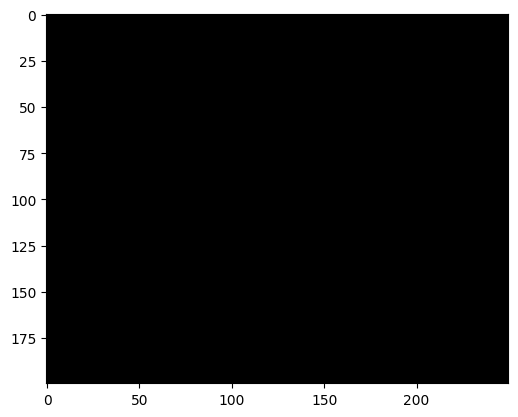

In [57]:
show_episode(states, clear_output=True)

In [1]:
from gold_room_env import MiniHackGoldRoom
from utils import show_episode, ALLOWED_COMPOSITE_MOVES, ALLOWED_SIMPLE_MOVES
from planning import a_star_search, uniform_cost_search, greedy_search, apply
from online_search import online_search_f, online_greedy_search, simulated_annealing
import gym
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

In [54]:
WIDTH = 5
HEIGHT = 5
N_GOLDS = 5
N_LEPS = 0
GOLD_SCORE = 100
STAIR_SCORE = 0
TIME_PENALTY = -1
MAX_STEPS = 100

env = gym.make(
    'MiniHack-MyTask-Custom-v0',
    width=WIDTH,
    height=HEIGHT,
    n_leps=N_LEPS,
    n_golds=N_GOLDS,
    max_episode_steps=MAX_STEPS,
    gold_score=GOLD_SCORE,
    stair_score=STAIR_SCORE,
    time_penalty=TIME_PENALTY
    )

print(f'Starting position: {env.agent_coord}, Stair position: {env.stair_coord}')
print(f'Gold positions: {env.gold_coords}\n')

env.myreset()
states, rewards, done, iters, steps = simulated_annealing(env=env, max_steps=MAX_STEPS, k=1)
rws_round = [round(r, 3) for r in rewards]
sum_rws_round = round(sum(rewards), 3)
print(f'Online Greedy Search\nRewards: {rws_round}, sum: {sum_rws_round}\n')

Starting position: (4, 1), Stair position: (2, 2)
Gold positions: [(4, 1), (3, 4), (2, 3), (2, 2), (0, 0)]

Online Greedy Search
Rewards: [0.0, -1.0, -1.414, -1.0, -1.414, -1.414, -1.0, -1.0, -1.414, -1.0, -1.414, -1.414, -1.414, -1.0, 98.586, -1.0, -1.0, 98.586, -1.0, -1.414, -1.0, 99.0], sum: 274.858



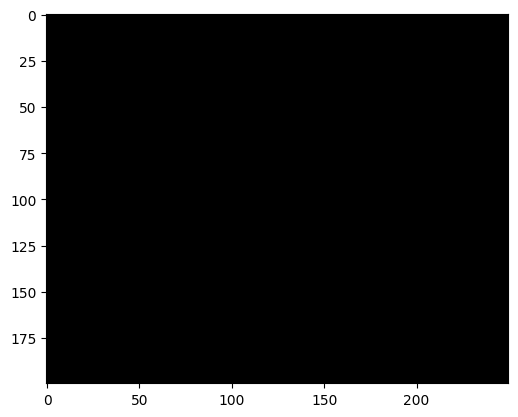

In [45]:
show_episode(states, clear_output=True)

In [55]:
print(done)
print(iters)
print(steps)

True
24
21


In [60]:
from gold_room_env import MiniHackGoldRoom
from utils import show_episode, ALLOWED_COMPOSITE_MOVES, ALLOWED_SIMPLE_MOVES
from planning import a_star_search, uniform_cost_search, greedy_search, apply
from online_search import online_random_greedy_search
import gym
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

In [64]:
WIDTH = 5
HEIGHT = 5
N_GOLDS = 5
N_LEPS = 0
GOLD_SCORE = 100
STAIR_SCORE = 0
TIME_PENALTY = -1
MAX_STEPS = 100

env = gym.make(
    'MiniHack-MyTask-Custom-v0',
    width=WIDTH,
    height=HEIGHT,
    n_leps=N_LEPS,
    n_golds=N_GOLDS,
    max_episode_steps=MAX_STEPS,
    gold_score=GOLD_SCORE,
    stair_score=STAIR_SCORE,
    time_penalty=TIME_PENALTY
    )

print(f'Starting position: {env.agent_coord}, Stair position: {env.stair_coord}')
print(f'Gold positions: {env.gold_coords}\n')

env.myreset()
states, rewards, done, i = online_random_greedy_search(env=env, max_steps=MAX_STEPS, prob_rand_move = 0.5)
rws_round = [round(r, 3) for r in rewards]
sum_rws_round = round(sum(rewards), 3)
print(f'Online Greedy Search\nRewards: {rws_round}, sum: {sum_rws_round}\n')

Starting position: (2, 1), Stair position: (3, 3)
Gold positions: [(0, 0), (4, 0), (3, 4), (4, 2), (0, 2)]

Online Greedy Search
Rewards: [0.0, -1.0, -1.414, -1.414, -1.0, 99.0, -1.0, -1.414, 99.0, -1.0, -1.0, -1.0, 98.586, -1.0, -1.0, 99.0, -1.0, 99.0, -1.414, -1.0, -1.0], sum: 477.929



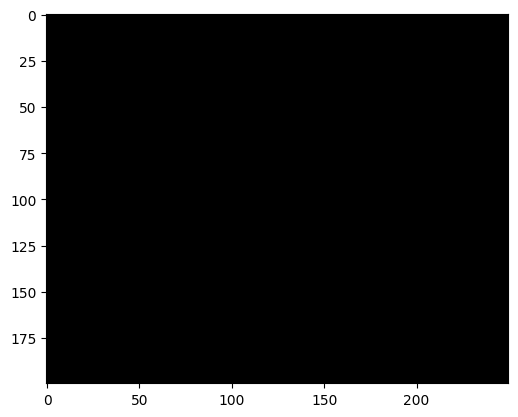

In [65]:
show_episode(states, clear_output=True)

In [62]:
print(done)
print(iters)
print(steps)

True
17
17


In [9]:
WIDTH = list(range(4, 11))
HEIGHT = WIDTH
N_GOLDS = lambda width, height: int(width * height * 0.1)
N_LEPS = 0
GOLD_SCORE = 100
STAIR_SCORE = 0
TIME_PENALTY = -1
MAX_STEPS = 1000
SAMPLES_PER_SETTING = 10

settings = []

for width, height in zip(WIDTH, HEIGHT):
    for n_golds in tqdm(range(N_GOLDS(width=width, height=height)), total=N_GOLDS(width=width, height=height), desc=f'{width}x{height}'):
        setting = {
            'width': width,
            'height': height,
            'n_golds': n_golds,
            'samples': [],
            'stats': []
        }
        for _ in range(SAMPLES_PER_SETTING):
            env = gym.make(
                'MiniHack-MyTask-Custom-v0',
                width=width,
                height=height,
                n_leps=N_LEPS,
                n_golds=n_golds,
                max_episode_steps=MAX_STEPS,
                gold_score=GOLD_SCORE,
                stair_score=STAIR_SCORE,
                time_penalty=TIME_PENALTY
                )
            
            setting['samples'].append(env)

            plan, n_expanded = a_star_search(env=env, allowed_moves_function=ALLOWED_SIMPLE_MOVES)

            # -----------------------------------------------------------------------------------------------------------

            env.myreset()
            states, rewards, done = apply(env, plan)

            rws_round = []
            for r in rewards:
                rws_round.append(round(r, 3))
            sum_rws = sum(rewards)
            sum_rws_round = round(sum_rws, 3)

            sample_stats = {
                'optimal_score': sum_rws_round,
                'optimal_path': plan.path
            }

            # -----------------------------------------------------------------------------------------------------------

            env.myreset()
            states, rewards, done, i = online_search_f(env=env, max_steps=MAX_STEPS)

            rws_round = [round(r, 3) for r in rewards]
            sum_rws_round = round(sum(rewards), 3)

            sample_stats['online_search_score'] = sum_rws_round
            sample_stats['online_search_path'] = [state['agent_coord'] for state in states]

            setting['stats'].append(sample_stats)

            # -----------------------------------------------------------------------------------------------------------

    settings.append(setting)



4x4:   0%|          | 0/1 [00:00<?, ?it/s]

10x10: 100%|██████████| 10/10 [03:47<00:00, 22.74s/it]


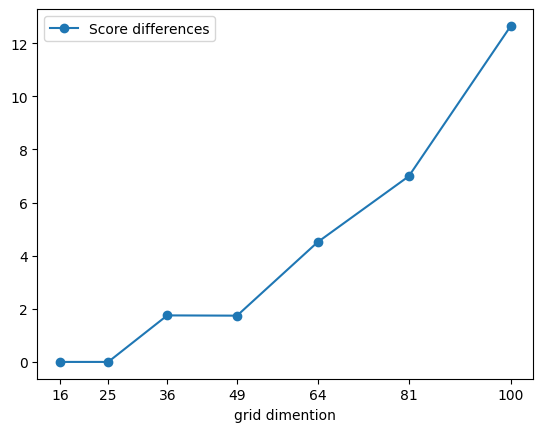

In [10]:
score_dists = [np.mean([np.abs(np.array(setting['stats'][i]['optimal_score']) - np.array(setting['stats'][i]['online_search_score'])) for i in range(SAMPLES_PER_SETTING)]) for setting in settings]

x_values = [width * height for width, height in zip(WIDTH, HEIGHT)]
y_values = score_dists

plt.plot(x_values, y_values, label='Score differences', marker='o')
plt.xticks(x_values, x_values)

plt.xlabel('grid dimention')

plt.legend()

plt.show()